# HW5

Miembros del grupo:
- Javier Gilabert  
- Lucia Alonso
-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read data

In [2]:
df = pd.read_csv('prosperLoanData_train.csv')
df_oot = pd.read_csv('prosperLoanData_oot.csv')

In [3]:
df.groupby('bad').size()

bad
False    22942
True        78
dtype: int64

## Differenciate between usable features and other columns

In [4]:
df_columns = pd.read_excel("Clasificacion_columnas_DS2.xlsx")
drop = df_columns.loc[df_columns["Keep/Drop"]=="Drop"]

In [5]:
features = [c for c in df.columns if c not in drop.Column.values]
col_target = 'bad'

In [8]:
features

['BorrowerRate',
 'ListingCategory (numeric)',
 'Occupation',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'DateCreditPulled',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'DelinquenciesLast7Years',
 'IncomeRange',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'LoanCurrentDaysDelinquent',
 'LoanFirstDefaultedCycleNumber',
 'LoanMonthsSinceOrigination',
 'LoanOriginationDate',
 'PW',
 'fraud',
 'bad',
 'indeterm',
 'LoanOriginationYear']

## Data exploration

El primer enfoque que le daremos a nuestras variables será el conocer el tipo de variables que son.
- Por una parte, observamos que muchas variables son de tipo *float64*, las cuales serán como **variables numéricas**
- Por otra parte, observamos que otras variables son de tipo *object* o incluso *booleanos*, las cuales serán **variables categóricas**

In [9]:
df[features].dtypes

BorrowerRate                           float64
ListingCategory (numeric)                int64
Occupation                              object
EmploymentStatus                        object
IsBorrowerHomeowner                       bool
CurrentlyInGroup                          bool
DateCreditPulled                        object
TotalCreditLinespast7years             float64
OpenRevolvingAccounts                    int64
DelinquenciesLast7Years                float64
IncomeRange                             object
StatedMonthlyIncome                    float64
TotalProsperLoans                      float64
ProsperPaymentsLessThanOneMonthLate    float64
ProsperPaymentsOneMonthPlusLate        float64
ProsperPrincipalBorrowed               float64
ProsperPrincipalOutstanding            float64
LoanCurrentDaysDelinquent                int64
LoanFirstDefaultedCycleNumber          float64
LoanMonthsSinceOrigination               int64
LoanOriginationDate                     object
PW           

Establecemos una disgregación de variables, para ello separemos aquellas variables que sean categóricas de las que sean numéricas y sobre ellas realizaremos un análisis estadístico descriptivo para ir comparándo unas con las otras e intrepetar los resultados estadísticamente más significativos

In [10]:
cat_features = [f for f, b in zip(features, df[features].dtypes == object) if b==True]
num_features = [f for f in features if f not in cat_features]

In [11]:
df[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BorrowerRate,23020.0,0.220267,0.082392,0.04,0.148500,0.228700,0.2997,3.600000e-01
ListingCategory (numeric),23020.0,4.000912,4.468944,0.00,1.000000,2.000000,7.0000,2.000000e+01
TotalCreditLinespast7years,23020.0,26.280626,13.826290,2.00,16.000000,24.000000,34.0000,1.180000e+02
OpenRevolvingAccounts,23020.0,6.467897,4.313678,0.00,3.000000,6.000000,9.0000,3.800000e+01
DelinquenciesLast7Years,23020.0,3.599913,9.016383,0.00,0.000000,0.000000,2.0000,9.900000e+01
StatedMonthlyIncome,23020.0,5605.113930,12573.396068,0.00,3133.333333,4583.333333,6750.0000,1.750003e+06
TotalProsperLoans,7176.0,1.380574,0.693991,0.00,1.000000,1.000000,2.0000,7.000000e+00
ProsperPaymentsLessThanOneMonthLate,7176.0,0.690635,2.580798,0.00,0.000000,0.000000,0.0000,4.200000e+01
ProsperPaymentsOneMonthPlusLate,7176.0,0.069119,0.675682,0.00,0.000000,0.000000,0.0000,2.100000e+01
ProsperPrincipalBorrowed,7176.0,7363.266377,6407.530920,0.00,3000.000000,5000.000000,10000.0000,5.749900e+04


In [12]:
df[cat_features].describe().transpose()

,count,unique,top,freq
Occupation,23020,66,Other,6199
EmploymentStatus,23020,7,Employed,15802
DateCreditPulled,23020,23016,2011-09-20 13:24:11,2
IncomeRange,23020,7,"$25,000-49,999",7396
LoanOriginationDate,23020,868,2012-07-31,144


### Custom Pandas describing

**TODO 1** Crea una función que cumpla con la funcionalidad descrita en la cabecera de la función desc_num

In [13]:
def desc_num(df, df_oot):

    results = {}

    numeric_cols = df[num_features].select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        results[col] = {}
        results[col]['Mean'] = df[col].mean()
        results[col]['Median'] = df[col].median()
        results[col]['Minimum'] = df[col].min()
        results[col]['Maximum'] = df[col].max()
        results[col]['P25)'] = df[col].quantile(0.25)
        results[col]['P75)'] = df[col].quantile(0.75)
        results[col]['STD'] = df[col].std()
        results[col]['%NA'] = (df[col].isnull().mean() * 100)
        results[col]['%Non_zero'] = (df[col].astype(bool).sum() / len(df) * 100)
        results[col]['%Unique'] = (len(df[col].unique()) / len(df) * 100)

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        axs[0].hist(df[col], bins=20, color='blue', alpha=0.7, label='In-Time')
        axs[0].hist(df_oot[col], bins=20, color='red', alpha=0.7, label='Out-of-Time')
        axs[0].set_title('Histogram')
        axs[0].set_xlabel(col)
        axs[0].legend()

        sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
        sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])
        axs[1].set_title('Stability Plot')
        axs[1].set_xlabel(col)
        axs[1].legend()

        plt.show()

    return results



/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


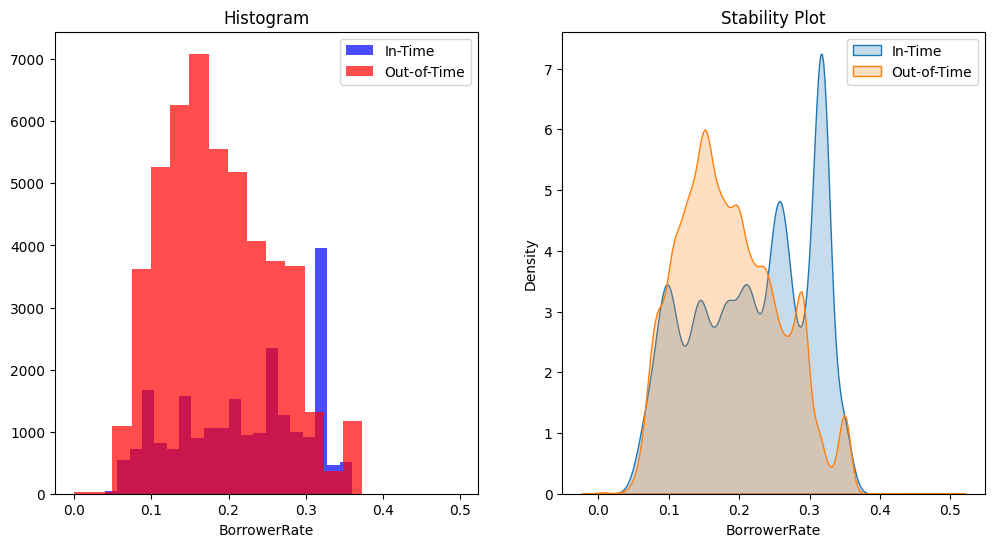

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


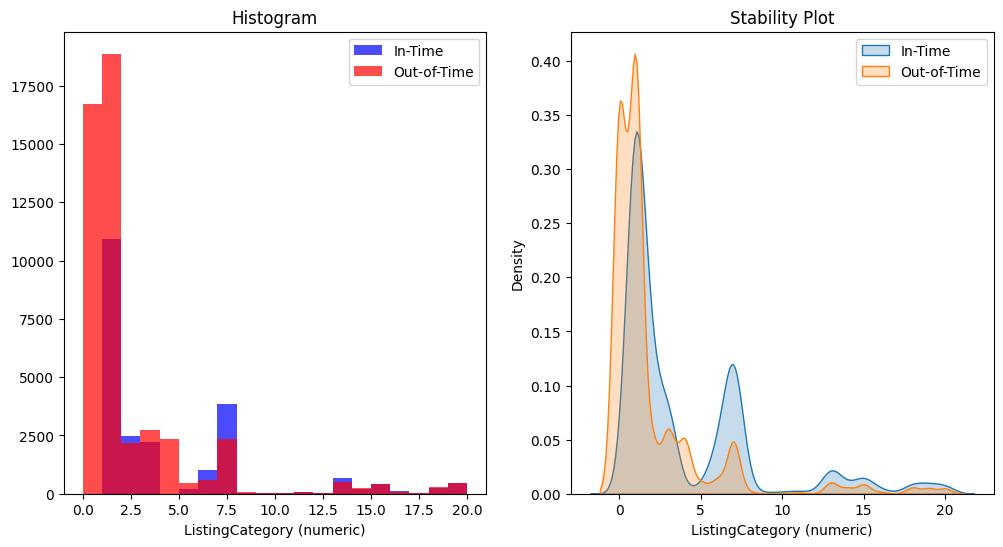

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


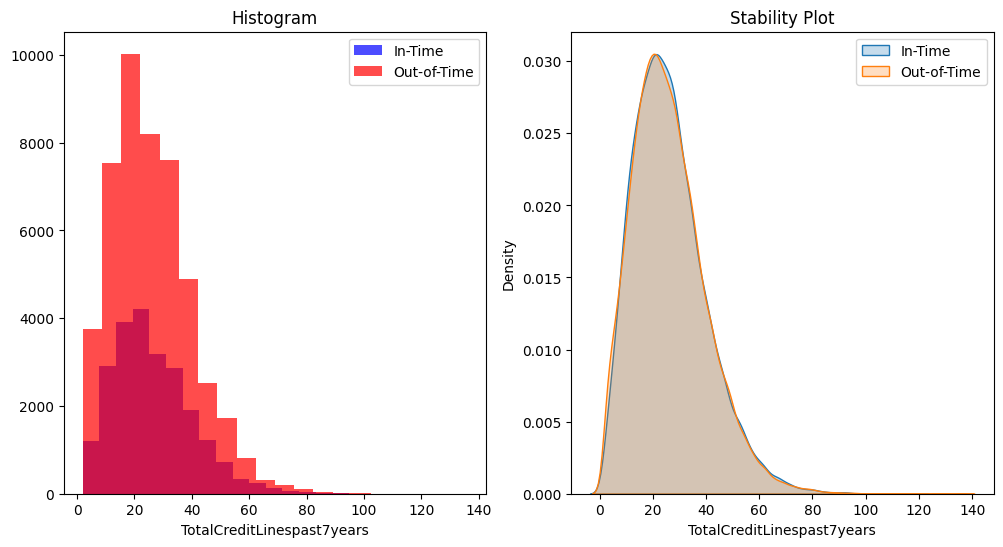

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


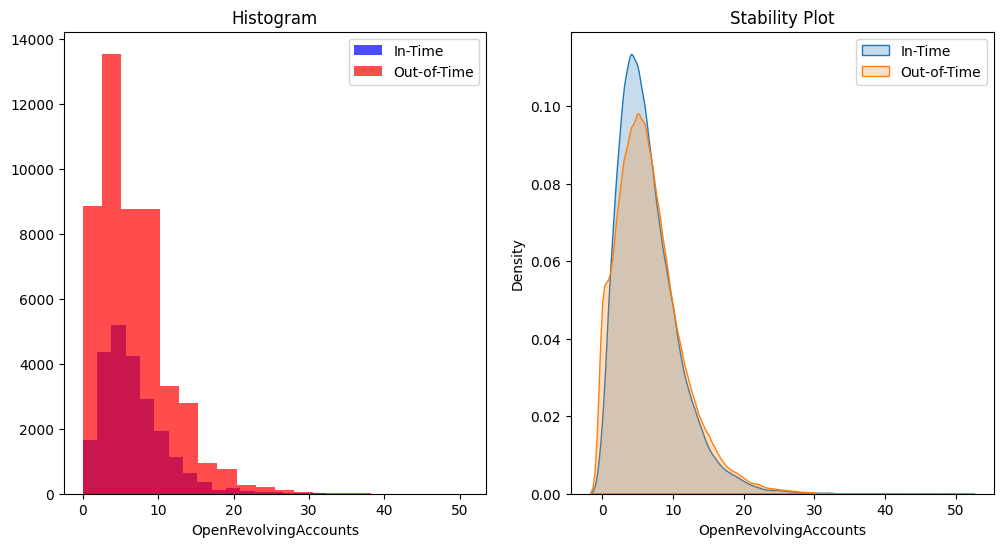

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


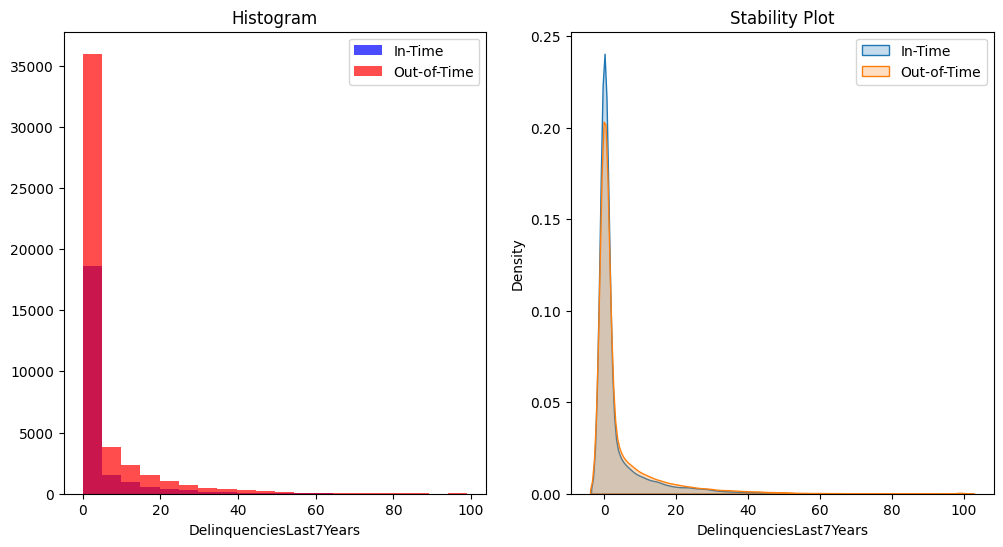

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


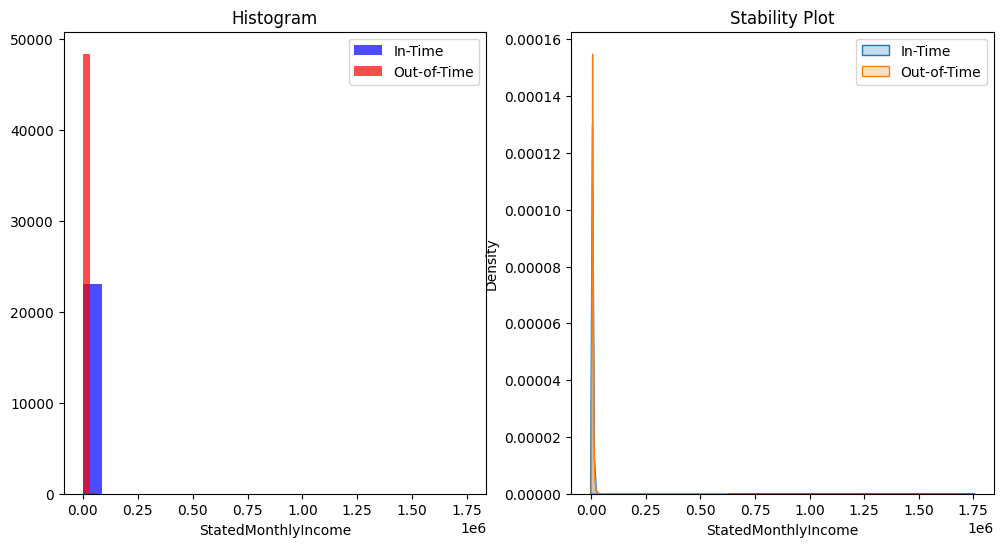

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


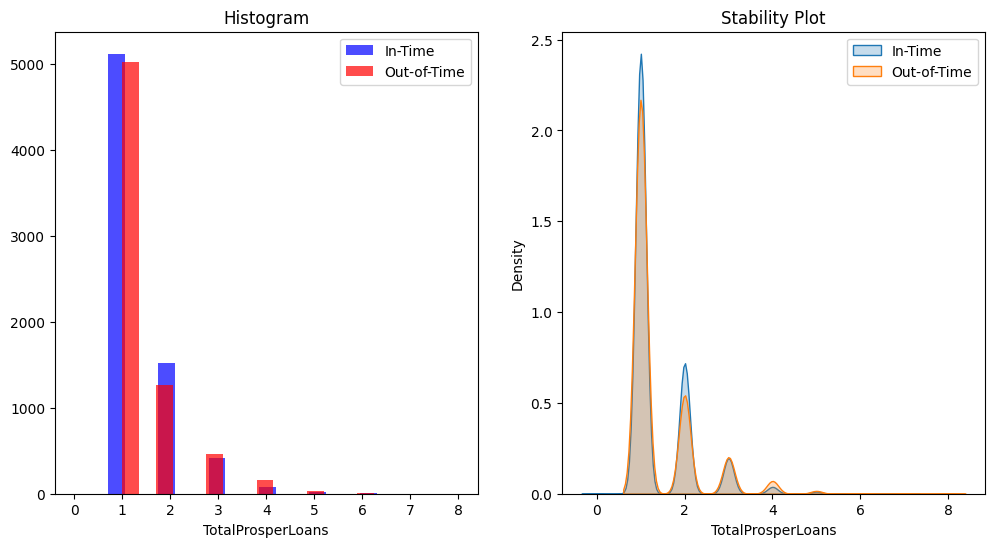

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


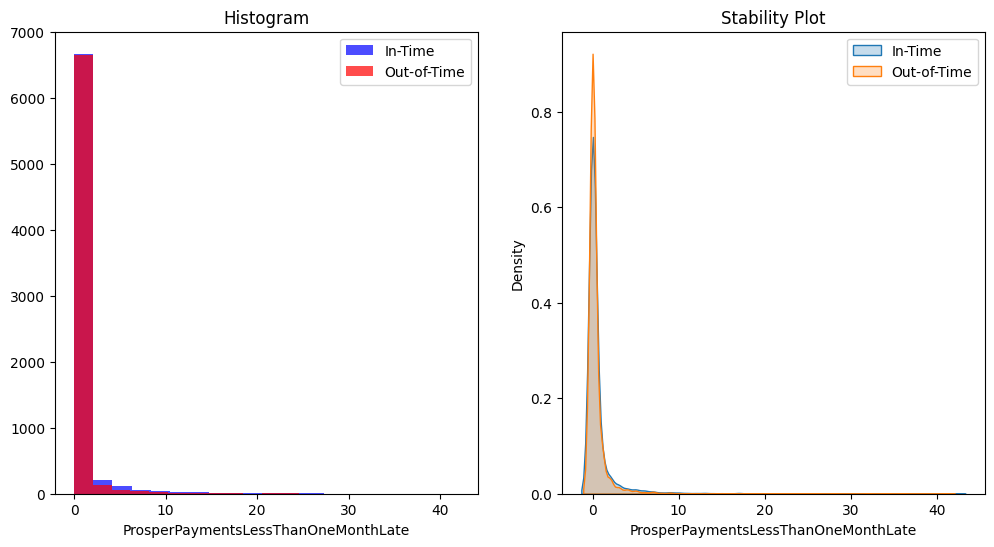

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


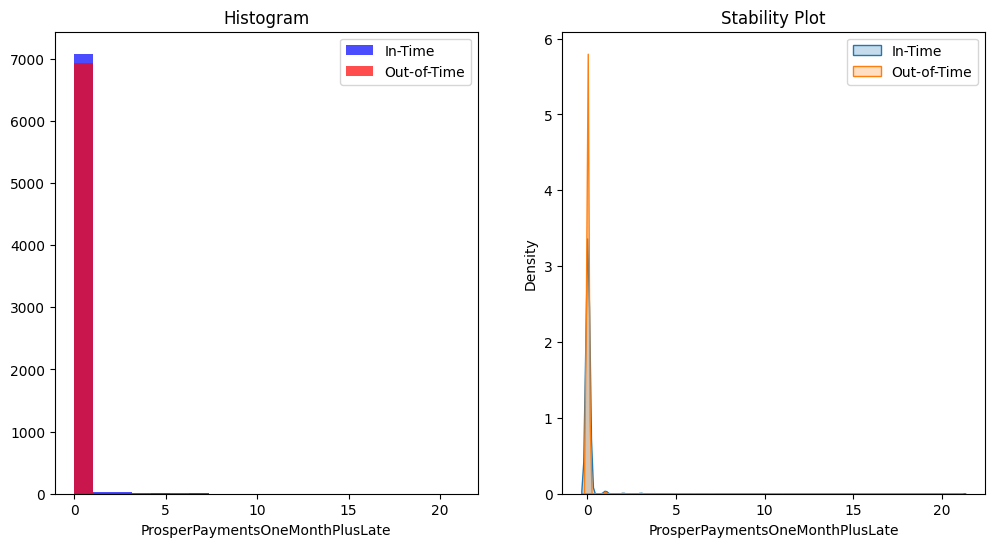

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


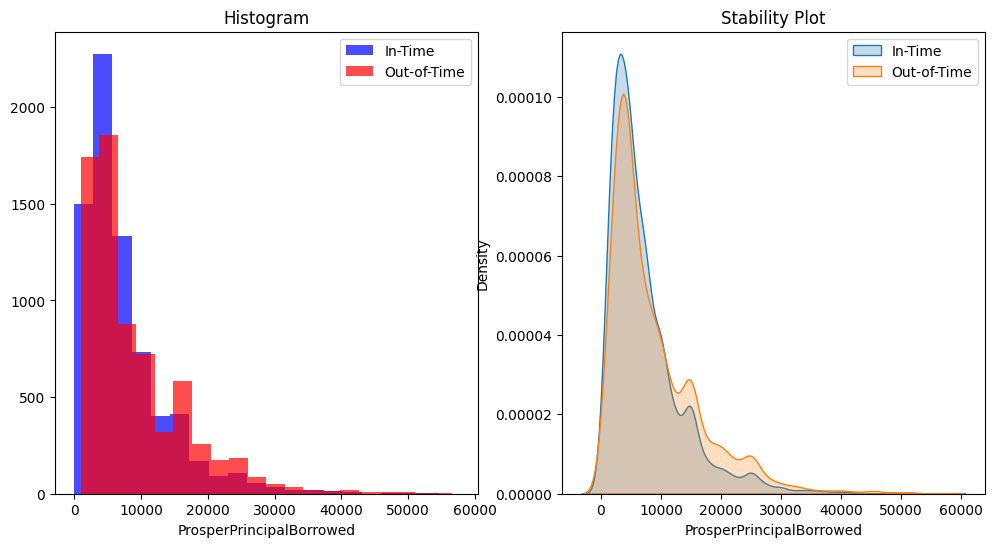

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


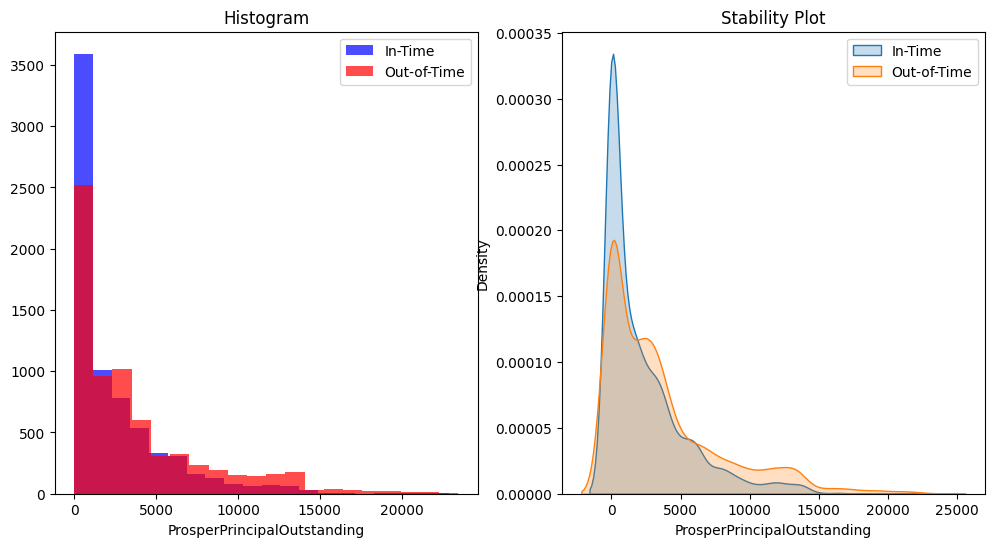

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


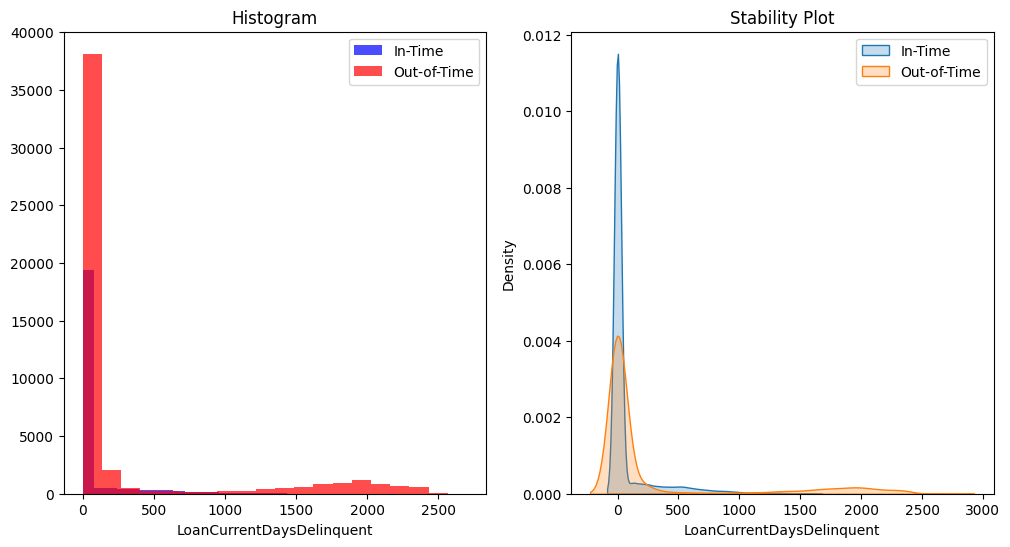

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


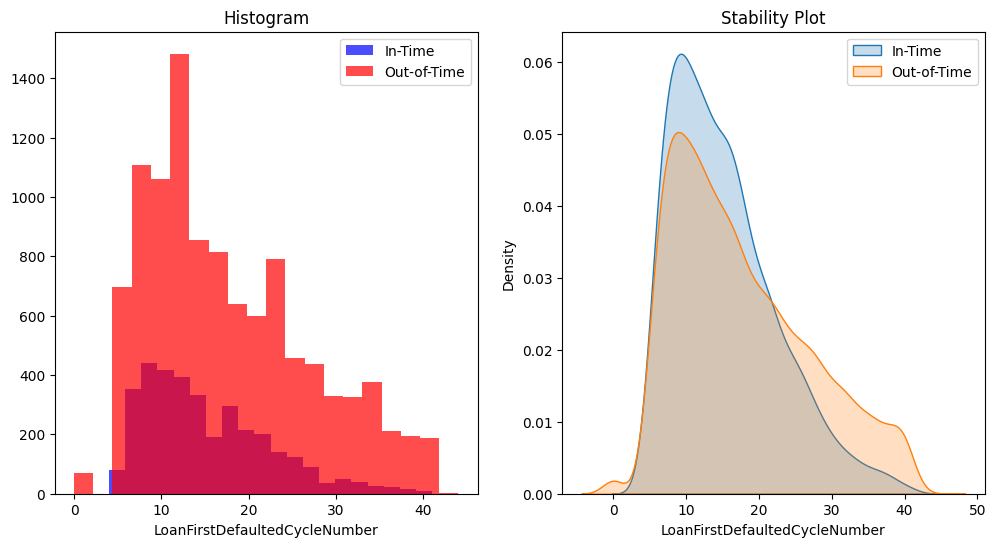

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


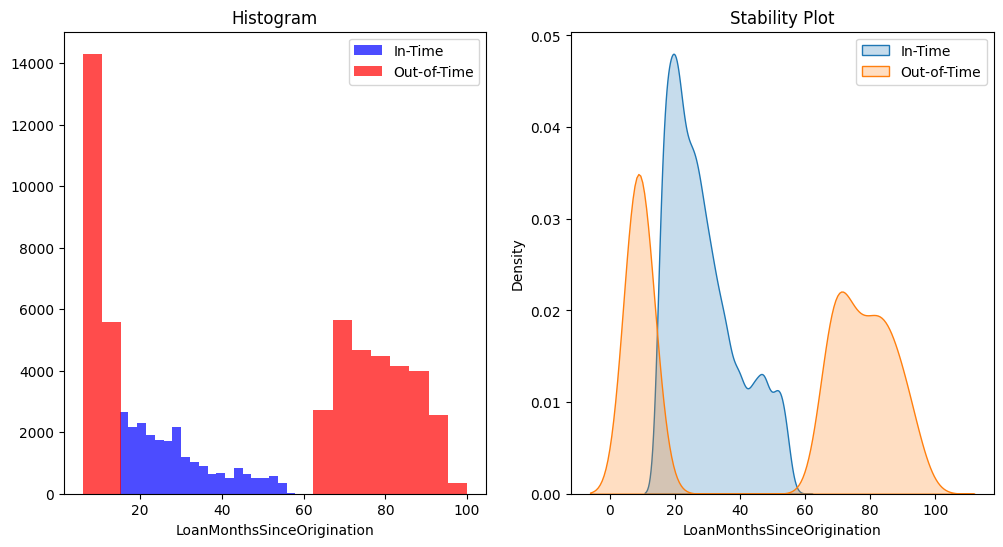

/tmp/ipykernel_2105/3738094555.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/tmp/ipykernel_2105/3738094555.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


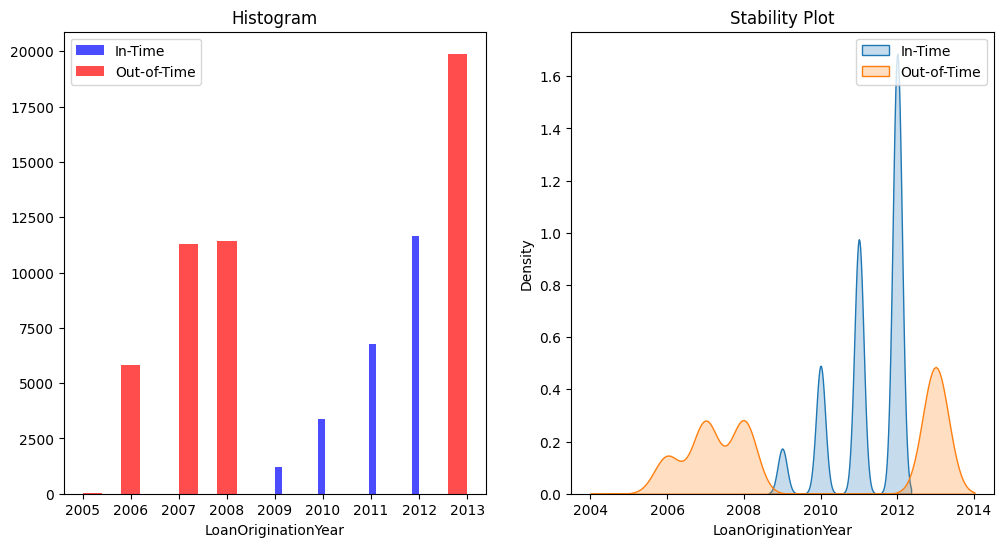

Results for BorrowerRate:


NameError: name 'stat' is not defined

In [14]:
#### EJECUTA AQUÍ LA FUNCIÓN desc_num para todas la variables numéricas
results = desc_num(df, df_oot)

# Muestra los resultados
for col, stats in results.items():
    print(f"Results for {col}:")
    print(f"{stat}: {value}")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print()

**TODO 2** Crea una función que cumpla con la funcionalidad descrita en la cabecera de la función desc_cat

In [65]:
from collections import Counter

def desc_cat(df, df_oot, col):
    results_2 = {}
    
    unique_entries = df[col].nunique()
    percentage_unique_entries = (unique_entries / len(df)) * 100
    top_frequent_entry = df[col].mode().iloc[0]
    frequency_of_top_entry = (df[col] == top_frequent_entry).sum() / len(df) * 100
    na_rate = df[col].isna().mean() * 100
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="hot")
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    results_2['Unique Entries'] = unique_entries
    results_2['% Unique Entries'] = percentage_unique_entries
    results_2['Top Frequent Entry'] = top_frequent_entry
    results_2['Frequency of Top Entry'] = frequency_of_top_entry
    results_2['NA Rate'] = na_rate
    
    return results_2

Results for CreditGrade


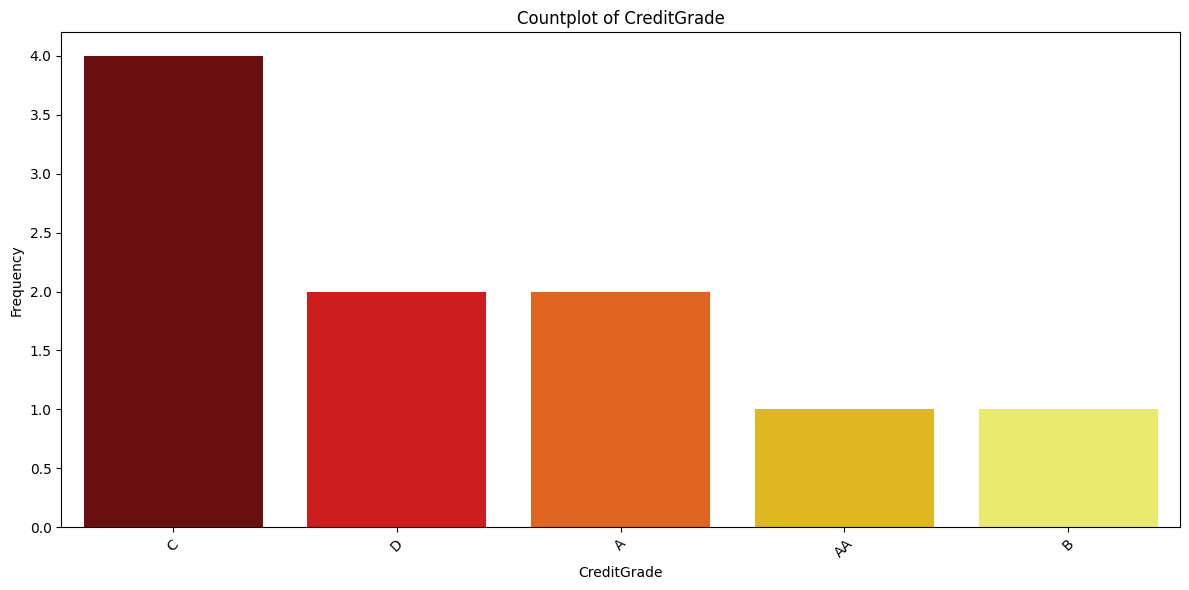

{'Unique Entries': 5, '% Unique Entries': 0.029434273267793017, 'Top Frequent Entry': 'C', 'Frequency of Top Entry': 0.023547418614234414, 'NA Rate': 99.94113145346442}
Results for Occupation


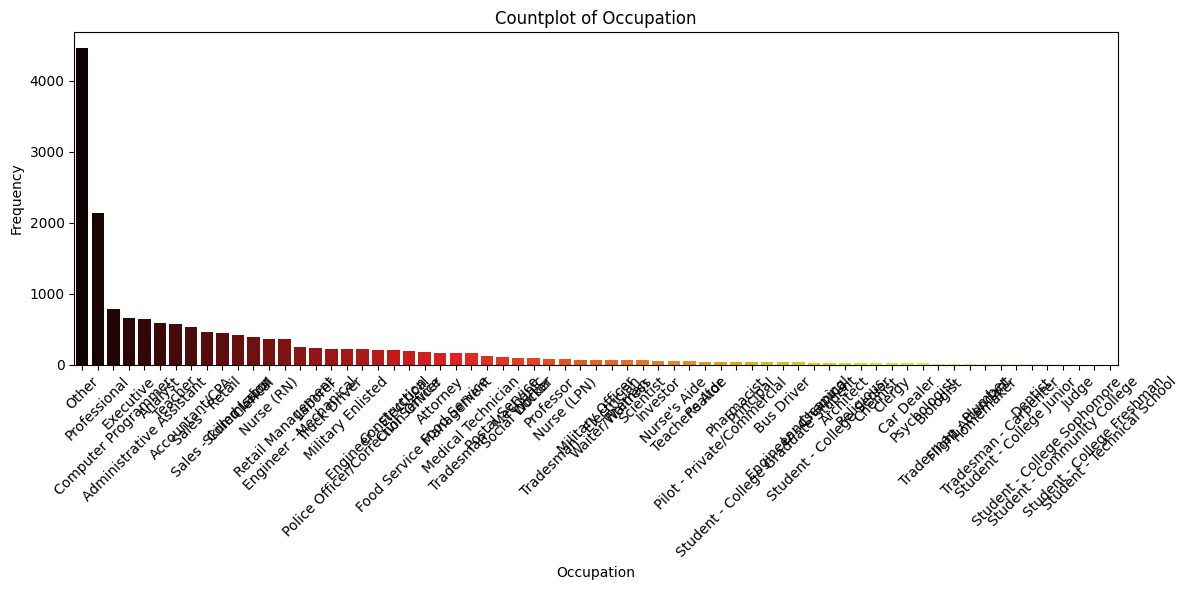

{'Unique Entries': 67, '% Unique Entries': 0.39441926178842646, 'Top Frequent Entry': 'Other', 'Frequency of Top Entry': 26.25537175487137, 'NA Rate': 0.0}
Results for EmploymentStatus


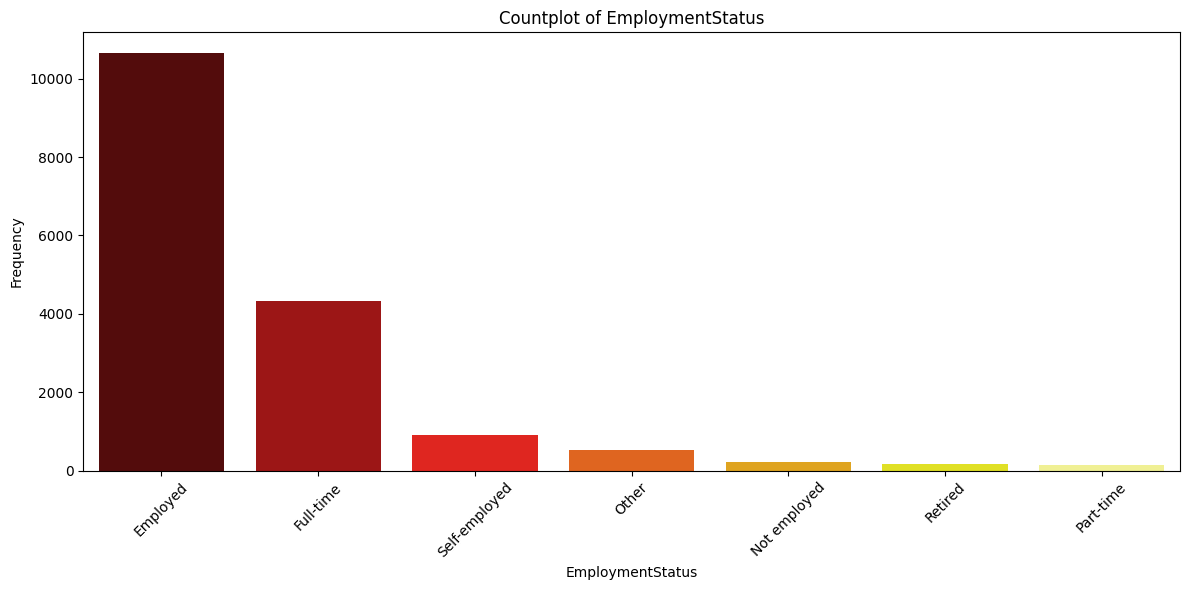

{'Unique Entries': 7, '% Unique Entries': 0.04120798257491023, 'Top Frequent Entry': 'Employed', 'Frequency of Top Entry': 62.67734149643845, 'NA Rate': 0.0}


In [66]:
#### EJECUTA AQUÍ LA FUNCIÓN desc_cat para todas las variable categóricas

for feat in cat_features:
    print(f"Results for {feat}")
    result_dict_cat = desc_cat(df, df_oot, feat)
    print(result_dict_cat)


### Correlation Review

In [1]:
numeric_cols = df[num_features].select_dtypes(include=[np.number]).columns

NameError: name 'df' is not defined

In [2]:
corr = df[numeric_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'df' is not defined

In [83]:
corr[corr!=1].max().sort_values().tail(5)

AvailableBankcardCredit       0.324461
OpenCreditLines               0.576287
TotalCreditLinespast7years    0.576287
BorrowerAPR                   0.991768
BorrowerRate                  0.991768
dtype: float64

#### Get pairs of highly correlated features

In [84]:
corr_TH = 0.75
n_corr_list = []
corr_feats_list = []

In [86]:
for f in numeric_cols:
    corr_f = corr[f][[col for col in numeric_cols if col!=f]]
    corr_f_abs = corr_f.abs()
    corr_ht_th = corr_f_abs[corr_f_abs>corr_TH]
    n_corr_list.append(corr_ht_th.shape[0])
    corr_feats_list.append(corr_ht_th)
    
corr_relations = [(feat, n, feats_corr) for n, feats_corr, feat in zip(n_corr_list, corr_feats_list, numeric_cols) if n>0]
corr_relations

[('BorrowerAPR',
  2,
  BorrowerRate    0.991768
  ProsperScore    0.783380
  Name: BorrowerAPR, dtype: float64),
 ('BorrowerRate',
  2,
  BorrowerAPR     0.991768
  ProsperScore    0.769944
  Name: BorrowerRate, dtype: float64),
 ('ProsperScore',
  2,
  BorrowerAPR     0.783380
  BorrowerRate    0.769944
  Name: ProsperScore, dtype: float64)]

### Recommended tool: pandas-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df[features])
profile.to_file(output_file='output.html')

In [ ]:
display(profile)

## IV / WoE


Una vez identificadas las variables más importantes, el siguiente paso que tenemos que hacer es establecer los trameados (buckets), con la misma acción para las variables categóricas y numéricas

In [87]:
#visualization functions
def capture_df(feat_col, input_slider, n_bins, df, target_col):
    """
    Handles the type of the data to generate the intermediate datadframe
    """
    if df[feat_col].dtype in [int, float, np.number]:
        return df_vol_br_num(feat_col, input_slider, n_bins, df, target_col)
    else:
        return df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col)

#capture volume / BR df for numerical variables
def df_vol_br_num(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for numerical features.
    """
    #get the numeric input from the dual slider
    perc_sliders = [v/100. for v in input_slider]
    var_lims = df[feat_col].quantile([perc_sliders[0], perc_sliders[1]]).values
    v_min, v_max = var_lims[0], var_lims[1]
    #filter the dataset using the slider input
    df_cut = df.loc[(df[feat_col] <= v_max) & (df[feat_col] >= v_min)][[obj_col, feat_col]]
    #number of cuts = minumum of n_bins, number of unique values of the variable
    n_cuts = min(int(n_bins), df_cut[feat_col].nunique())
    cuts = [c for c in np.linspace(v_min, v_max, n_cuts + 1)]
    if cuts[-1] < v_max:
        cuts.append(v_max)
    cut_col = feat_col + '_'
    df_cut[cut_col] = pd.cut(df_cut[feat_col], cuts, include_lowest=True)
    #generate aggregated values
    N = df_cut.groupby(cut_col)[feat_col].count().values
    TR = df_cut.groupby(cut_col)[obj_col].mean().values
    cuts = df_cut.groupby(cut_col)[feat_col].count().index.astype(str).values
    #handle NA entries
    if df[feat_col].isna().sum() > 0:
        N = np.append(([df[feat_col].isna().sum()]), N)
        TR = np.append(([df.loc[df[feat_col].isna()][obj_col].mean()]), TR)
        cuts =  np.append(['NA'], cuts)
    #generate global transformation rate
    return (pd.DataFrame({'cuts': cuts,
                         'N': N,
                         'BR': TR}), df_cut[obj_col].mean())

#capture volume / BR df for categorical variables
def df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for categorical features.
    """
    #pick top n_bins levels by volume
    cut_levels = df.groupby(feat_col)[feat_col].count().sort_values(ascending=False)[:int(n_bins)].index.values.tolist()
    df_cut = df.loc[df[feat_col].isin(cut_levels)]
    #capture volumes
    N = df_cut.groupby(feat_col)[feat_col].count().values
    #capture transformations
    TR = df_cut.groupby(feat_col)[target_col].mean().values
    return (pd.DataFrame({'cuts': df_cut.groupby(feat_col)[feat_col].count().index.astype(str).values,
                         'N': N,
                         'BR': TR}), df_cut[target_col].mean())


def output_graph_update(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the plotly plot showing the visualization of the intermediate 
    dataframe with volume and bad rate per bin.
    """
    #get the df with volume and bad rate
    df_tr, avg_tr = capture_df(feat_col, input_slider, n_bins, df, obj_col)
    #line represents transformation rate
    tr_line = go.Scatter(x = df_tr.cuts,
                         y = df_tr.BR,
                         yaxis = 'y2',
                         name = 'BR')
    #bar represents volume @ cut
    vol_bars = go.Bar(x = df_tr.cuts,
                      y = df_tr.N,
                      name = 'Volume')
    #avg line
    avg_line = go.Scatter(x = df_tr.cuts,
                          y = np.repeat(avg_tr, df_tr.shape[0]),
                          yaxis = 'y2',
                          name = 'AVG BR',
                          line = dict(
                              color = ('rgb(205, 0, 0)')
                                     )
                         )
    #small layout
    layout = go.Layout(
            title = 'BR for ' + feat_col,
            yaxis = dict(title = 'Volume',
                         range = [0, max(df_tr.N)]),
            yaxis2 = dict(title = 'BR',
                         overlaying='y',
                         side='right',
                         range = [0, max(df_tr.BR) + 0.05*max(df_tr.BR)])

        )
    return {'data': [vol_bars, tr_line, avg_line],
            'layout': layout}

In [7]:
# Ejemplo de una variable cortada en buckets
df_buckets, avg_ratio = df_vol_br_num('CreditScoreRangeLower', [0, 95], 5, df,'bad')
df_buckets

NameError: name 'df_vol_br_num' is not defined

**TODO 3** Implementa una función que calcule el IV de una variable:

In [95]:
def get_IV(df_buckets, col_vol="N", col_BR="BR"):
    total_IV = 0.0
    for i in range(df_buckets.shape[0]):
        if df_buckets[col_BR].iloc[i] > 0:
            event_pct = df_buckets[col_BR].iloc[i]
        else:
            event_pct = 0.0001 
        non_event_pct = 1 - event_pct
        IV = (non_event_pct - event_pct) * np.log(non_event_pct / event_pct)
        IV = IV * df_buckets[col_vol].iloc[i]
        total_IV += IV
    
    return total_IV

In [96]:
iv = get_IV(df_buckets, col_vol="N", col_BR="BR")
print("IV:", iv)

IV: 39313.55241566578


#### Estimate the IV for all features

In [99]:
ivs = []
for c in features:
    df_tr, avg_br = capture_df(c, [0., 95.], 5, df, 'bad')
    ivs.append(get_IV(df_tr))
df_iv = pd.DataFrame({'feature': features,
                      'IV': ivs}).sort_values(by='IV', ascending=False)
df_iv

/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/tmp/ipykernel_37940/25389059.py:6: DeprecationW

,feature,IV
21,bad,inf
22,indeterm,5.000654e+04
1,BorrowerAPR,4.426975e+04
3,ProsperScore,4.395684e+04
2,BorrowerRate,4.389867e+04
9,CurrentlyInGroup,4.055150e+04
8,IsBorrowerHomeowner,4.049480e+04
20,fraud,4.028581e+04
19,PW,4.028581e+04
16,DebtToIncomeRatio,4.016657e+04


### Visualize some features versus the Bad rate

In [100]:
#dynamic plotting libraries
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [101]:
df_iv.head()

,feature,IV
21,bad,inf
22,indeterm,5.000654e+04
1,BorrowerAPR,4.426975e+04
3,ProsperScore,4.395684e+04
2,BorrowerRate,4.389867e+04


In [102]:
#plot features
for c in df_iv.sort_values(by="IV", ascending=False).feature.values.tolist():
    py.iplot(output_graph_update(c, [0., 97.5], 6, df, 'bad'))

/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/tmp/ipykernel_37940/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



### Stability check - PSI

EL **PSI** es el test de estabilidad de la población. Más sobre el PSI en [esta web](https://mwburke.github.io/data%20science/2018/04/29/population-stability-index.html). El umbral de valores extraídos del PSI se interpreta de la siguiente manera:


- PSI <= 0,10 sin cambios significativos
-  0,10 < PSI <= 0,25 pequeños cambios,  investigar
- PSI > 0,25 cambio significativo

In [127]:
def PSI_numeric(series, in_out_time_series):
    """Returns the population stability index for numerical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']

    #base data deciles
    qqs = in_series.quantile(q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

    #cut the data, based in the base series deciles
    in_series_cut = pd.cut(in_series, sorted(list(set(qqs.values))), include_lowest=True)
    out_series_cut = pd.cut(out_series, sorted(list(set(qqs.values))), include_lowest=True)
    #count volume per bin
    in_grp = in_series_cut.value_counts(dropna=False)
    out_grp = out_series_cut.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    #small fix, so some inf values are fixed
    out_grp[out_grp==0] = 0.01

    #N observations in each series
    N_in = len(in_series_cut)
    N_out = len(out_series_cut)

    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out

    return sum((in_grp-out_grp)*np.log(in_grp/out_grp))

def PSI_categorical(series, in_out_time_series):
    """Returns the population stability index for categorical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']
    
    #count volume per level
    in_grp = in_series.value_counts(dropna=False)
    out_grp = out_series.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    
    #N observations in each series
    N_in = len(in_series)
    N_out = len(out_series)
    
    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out
    
    #put all together in a df
    df_grp = in_grp.to_frame().join(out_grp.to_frame(), lsuffix = '_in', rsuffix = '_out')
    df_grp = df_grp.fillna(0.000001)

    return sum((df_grp.data_in - df_grp.data_out) * np.log(df_grp.count_in / df_grp.count_out))

In [128]:
psi = []
#capture in time - out of time series
it_oot_series = pd.Series(np.hstack((np.ones(len(df)), np.zeros(len(df_oot)))))
#for all features

for c in features:
    col_series = pd.concat([df[c], df_oot[c]], ignore_index=True)
    if df[c].dtypes == object:
        psi.append(PSI_categorical(col_series, it_oot_series))
    else:
        psi.append(PSI_numeric(col_series, it_oot_series))

df_psi = pd.DataFrame({'feature': features,
                       'PSI': psi})
df_psi = df_psi.sort_values(by='PSI')
df_psi

AttributeError: 'DataFrame' object has no attribute 'data_in'

**TODO 4** Selecciona las dos variables más estables, y procesalas con la función "desc_num"

**TODO 5** Selecciona las dos variables menos estables, y procesalas con la función "desc_num"

In [ ]:
#save the data, as it will come handy in future work
# Se escribe serializado
import pickle
#build a dictionary and serialize it
dict_dump = {'features': features,
             'corr_data': corr_relations,
             'iv_df': df_iv,
             'psi_df': df_psi}
pickle.dump(dict_dump, open('output_HW5.pkl', 'wb'))